In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/TMDB_cleaned.csv')

In [16]:
df.head(10)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,genre_tv_movie,genre_history,production_company_count,language_count,is_english,is_hollywood,budget_level,movie_age,keyword_count,is_released
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,0,0,3,4,1,1,very_high,14.0,20,1
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,0,0,3,1,1,1,very_high,10.0,32,1
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,0,0,5,2,1,1,very_high,16.0,18,1
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,0,0,4,2,1,1,very_high,15.0,20,1
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,0,0,1,3,1,1,very_high,12.0,9,1
5,293660,Deadpool,7.606,28894,Released,2016-02-09,783100000,108,False,/en971MEXui9diirXlogOrPKmsEn.jpg,...,0,0,3,1,1,1,very_high,8.0,6,1
6,299536,Avengers: Infinity War,8.255,27713,Released,2018-04-25,2052415039,149,False,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,...,0,0,1,2,1,1,very_high,6.0,12,1
7,550,Fight Club,8.438,27238,Released,1999-10-15,100853753,139,False,/hZkgoQYus5vegHoetLkCJzb17zJ.jpg,...,0,0,7,1,1,1,very_high,25.0,14,1
8,118340,Guardians of the Galaxy,7.906,26638,Released,2014-07-30,772776600,121,False,/uLtVbjvS1O7gXL8lUOwsFOH4man.jpg,...,0,0,1,1,1,1,very_high,10.0,8,1
9,680,Pulp Fiction,8.488,25893,Released,1994-09-10,213900000,154,False,/suaEOtk1N1sgg2MTM7oZd2cfVp3.jpg,...,0,0,3,3,1,1,very_high,30.0,16,1


In [23]:
# Ensure 'release_date' is in datetime format
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Drop rows with invalid release_date values
df = df.dropna(subset=['release_date'])

# Filter the DataFrame to only include rows between the years 1900 and 2024
df = df[(df['release_date'].dt.year >= 1900) & (df['release_date'].dt.year <= 2024)]

# Create a new column for the release month
df['release_month'] = df['release_date'].dt.month


# Confirm the filtering was successful
print(df['release_date'].describe())


count                           847748
mean     1999-02-22 20:59:18.061122176
min                1900-01-01 00:00:00
25%                1987-01-01 00:00:00
50%                2010-01-31 00:00:00
75%                2018-12-04 00:00:00
max                2024-12-31 00:00:00
Name: release_date, dtype: object


Bar Graph of Genre Count per Month

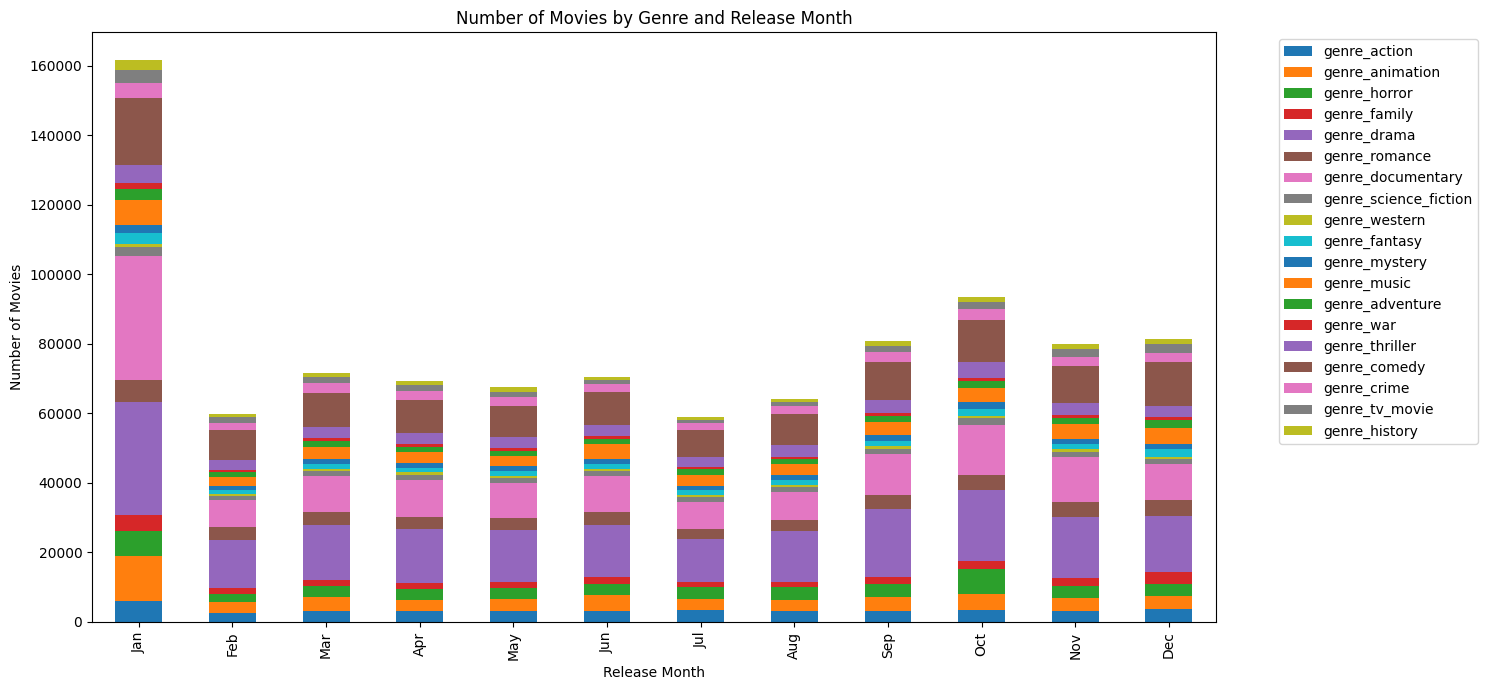

In [24]:
# Group data by release month and genres
genre_columns = ['genre_action', 'genre_animation', 'genre_horror', 'genre_family',
                 'genre_drama', 'genre_romance', 'genre_documentary', 'genre_science_fiction',
                 'genre_western', 'genre_fantasy', 'genre_mystery', 'genre_music',
                 'genre_adventure', 'genre_war', 'genre_thriller', 'genre_comedy',
                 'genre_crime', 'genre_tv_movie', 'genre_history']

# Summarize by month and genre
genre_counts_per_month = df.groupby('release_month')[genre_columns].sum()

# Plot each genre's count for each month
genre_counts_per_month.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title('Number of Movies by Genre and Release Month')
plt.xlabel('Release Month')
plt.ylabel('Number of Movies')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Total Revenue vs. Release Date
(both by year and by month - 2 plots)

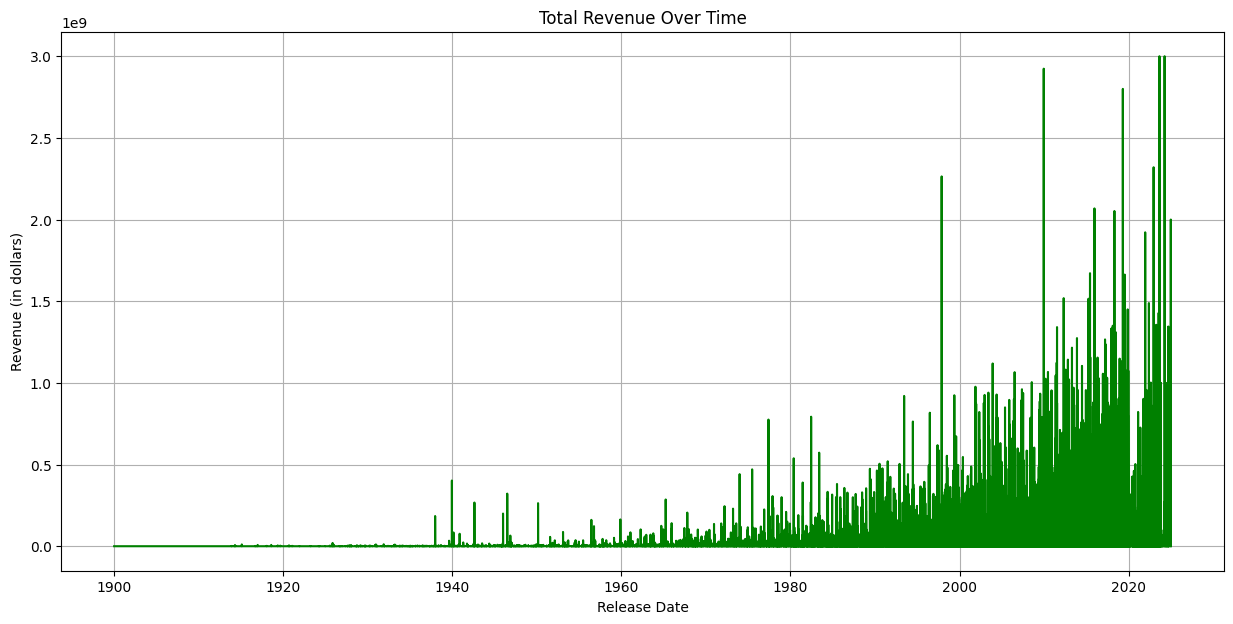

C:\Users\ejfor\AppData\Local\Temp\ipykernel_16188\730943451.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_per_month.index, y=revenue_per_month.values, palette='viridis')


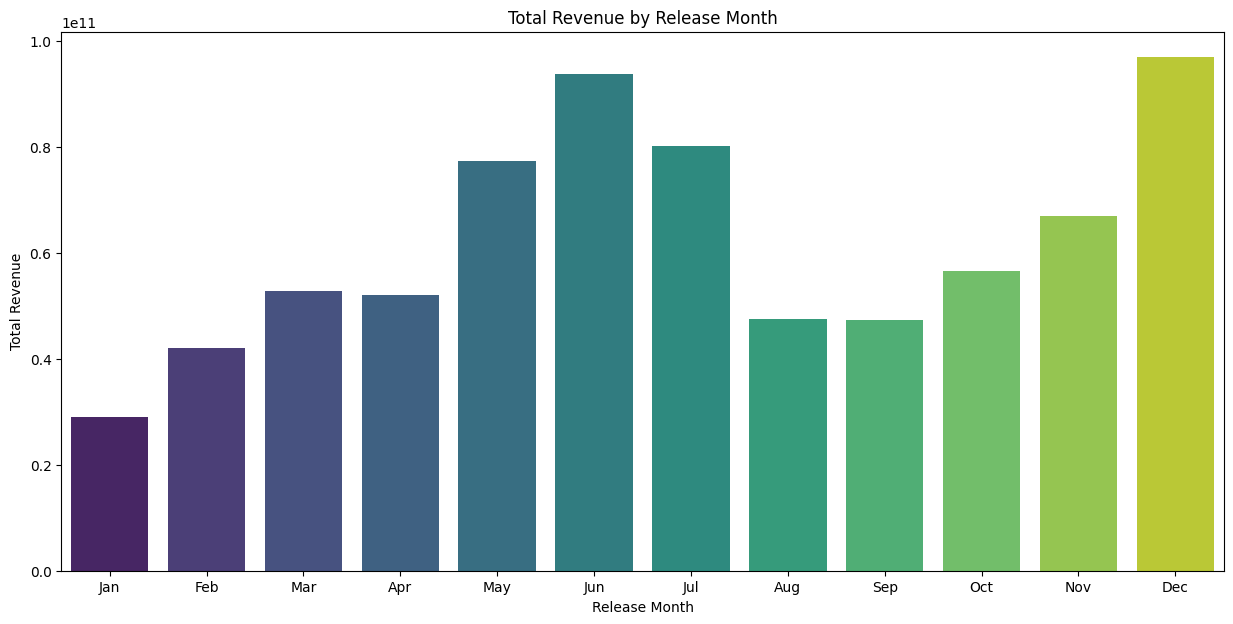

In [25]:
# Ensure 'release_date' is in datetime format
df['release_date'] = pd.to_datetime(df['release_date'])

# Sort by release date and plot
df_sorted = df.sort_values('release_date')
plt.figure(figsize=(15, 7))
plt.plot(df_sorted['release_date'], df_sorted['revenue'], color='green')
plt.title('Total Revenue Over Time')
plt.xlabel('Release Date')
plt.ylabel('Revenue (in dollars)')
# plt.xlim(left=1900,right=2024)
plt.grid(True)
plt.show()


# Summarize total revenue by month
revenue_per_month = df.groupby('release_month')['revenue'].sum()

# Plot
plt.figure(figsize=(15, 7))
sns.barplot(x=revenue_per_month.index, y=revenue_per_month.values, palette='viridis')
plt.title('Total Revenue by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Total Revenue')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()



Vote Average/Vote Count vs. Release Date (year)


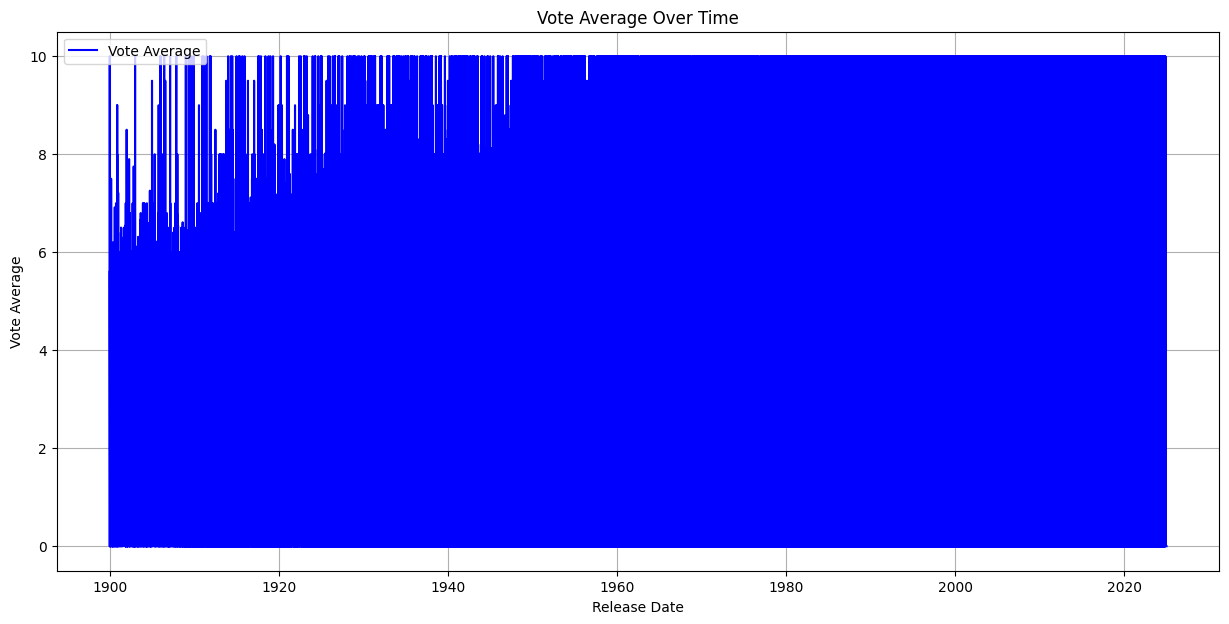

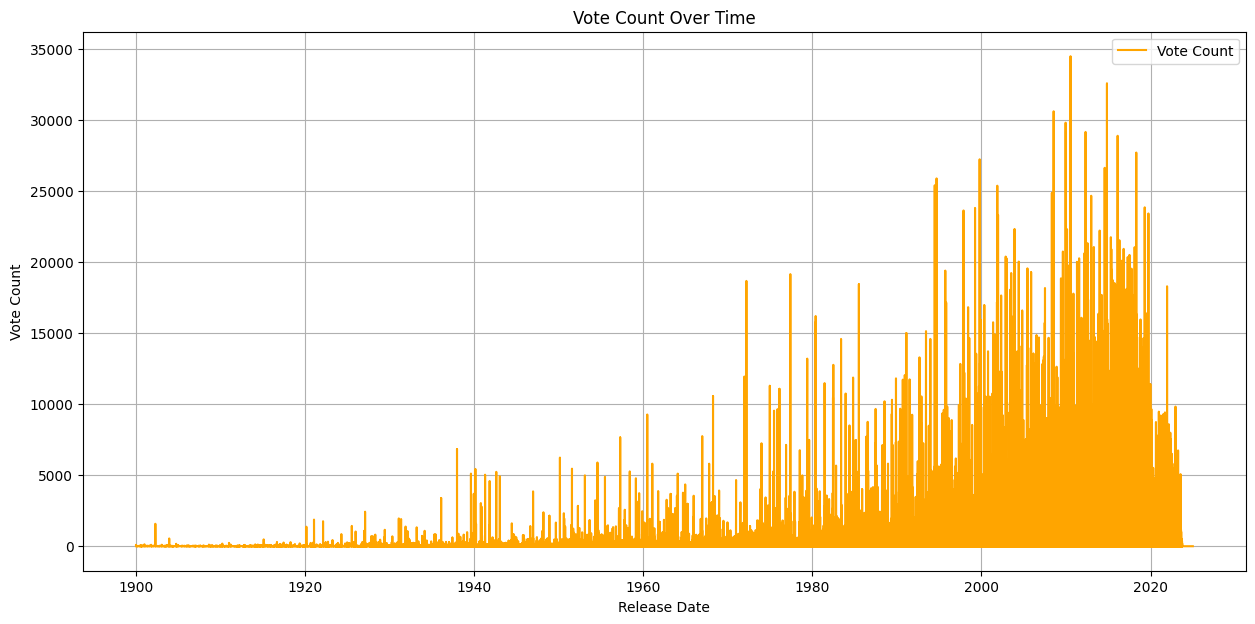

In [21]:
# Plot vote average
plt.figure(figsize=(15, 7))
plt.plot(df_sorted['release_date'], df_sorted['vote_average'], label='Vote Average', color='blue')
plt.title('Vote Average Over Time')
plt.xlabel('Release Date')
plt.ylabel('Vote Average')
plt.grid(True)
plt.legend()
plt.show()

# Plot vote count
plt.figure(figsize=(15, 7))
plt.plot(df_sorted['release_date'], df_sorted['vote_count'], label='Vote Count', color='orange')
plt.title('Vote Count Over Time')
plt.xlabel('Release Date')
plt.ylabel('Vote Count')
plt.grid(True)
plt.legend()
plt.show()


Vote Average/Vote Count vs. Release Date (monthly)


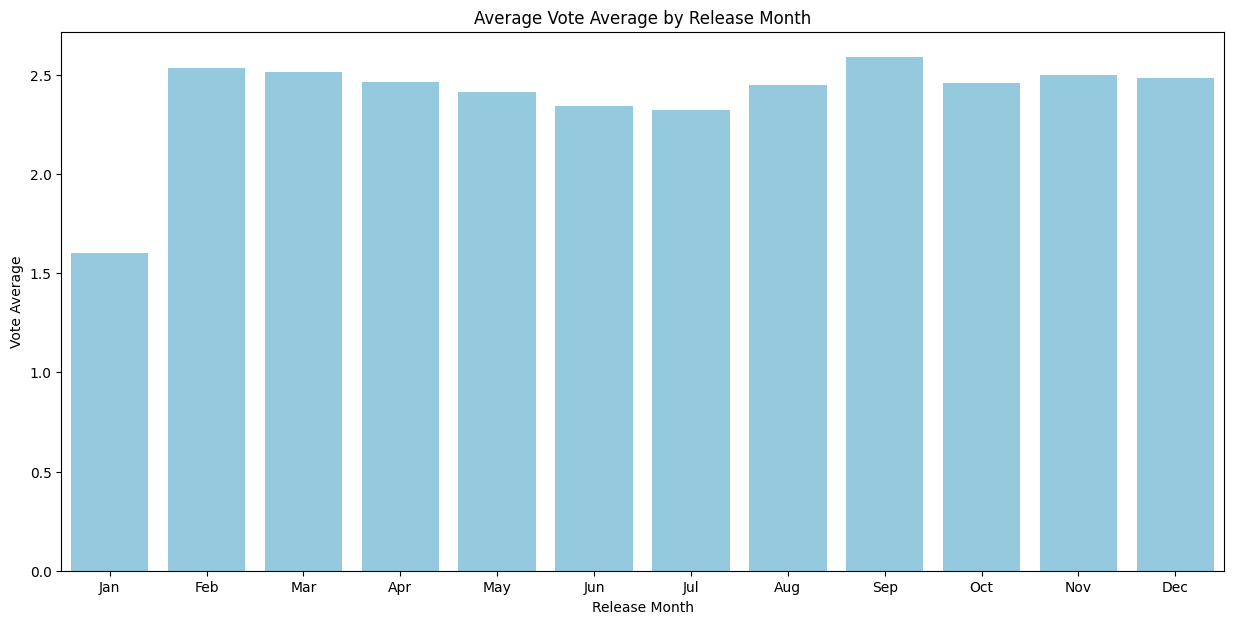

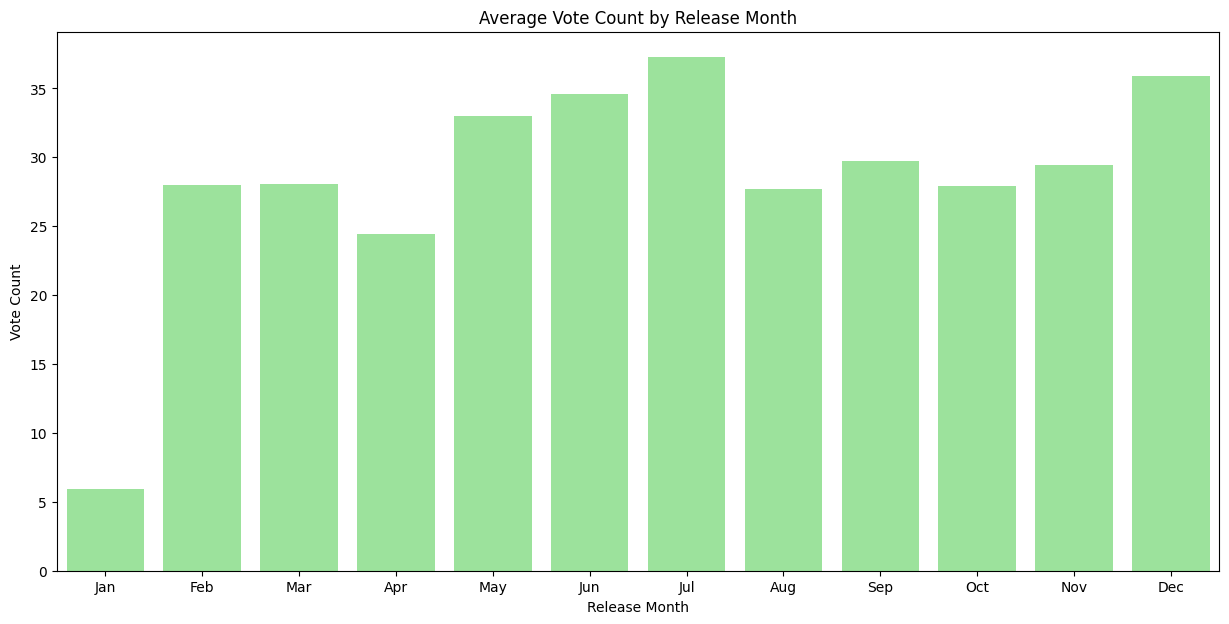

In [26]:
# Average vote average and vote count by release month
vote_avg_per_month = df.groupby('release_month')['vote_average'].mean()
vote_count_per_month = df.groupby('release_month')['vote_count'].mean()

# Plot vote average
plt.figure(figsize=(15, 7))
sns.barplot(x=vote_avg_per_month.index, y=vote_avg_per_month.values, color='skyblue')
plt.title('Average Vote Average by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Vote Average')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Plot vote count
plt.figure(figsize=(15, 7))
sns.barplot(x=vote_count_per_month.index, y=vote_count_per_month.values, color='lightgreen')
plt.title('Average Vote Count by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Vote Count')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


Vote Average/Vote Count vs. Genre (year)


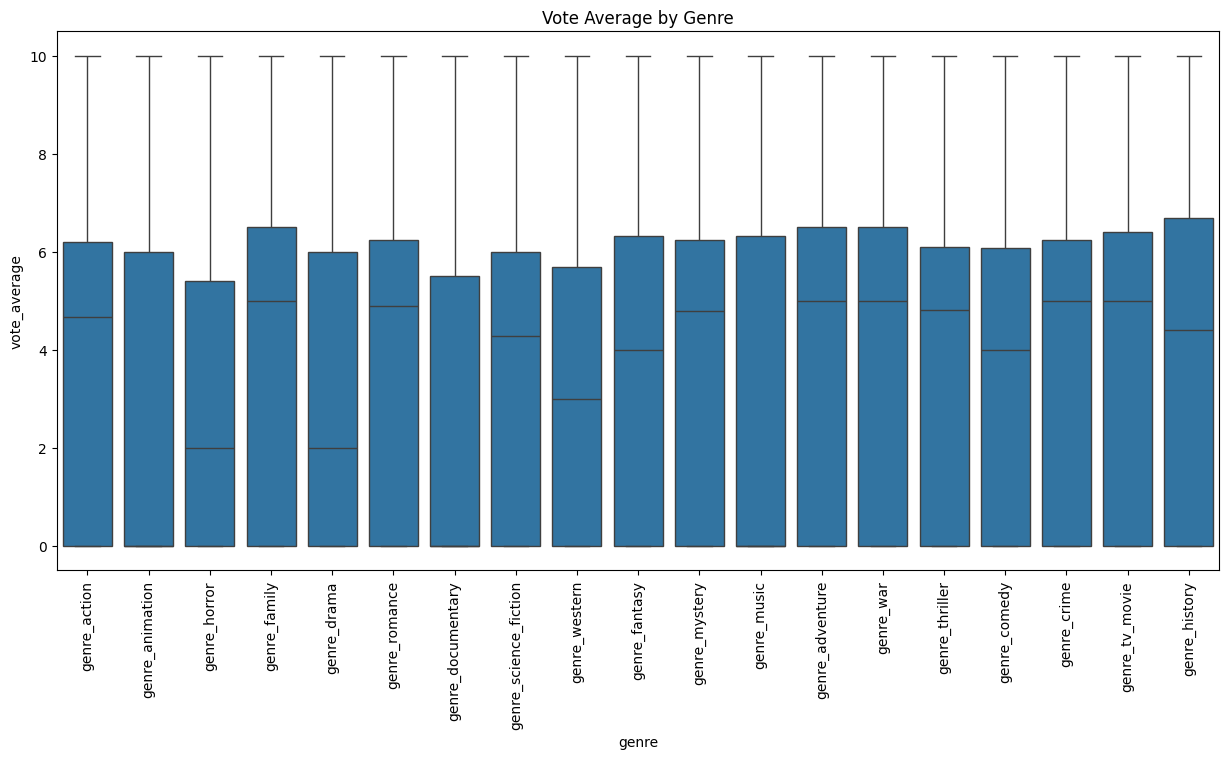

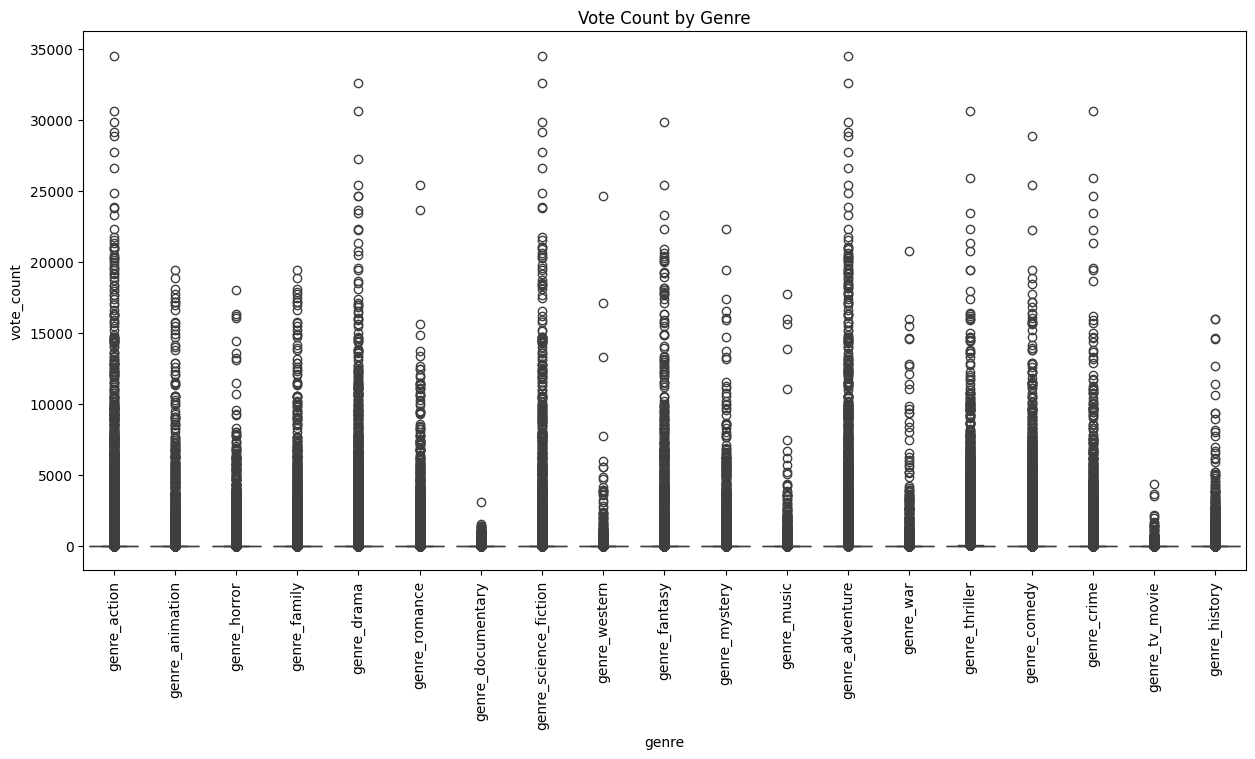

In [22]:
# Melt the data for genres to facilitate grouped plotting
genres_melted = df.melt(id_vars=['vote_average', 'vote_count'], value_vars=genre_columns, 
                        var_name='genre', value_name='is_genre')

# Filter to keep only rows where the genre is present
genres_melted = genres_melted[genres_melted['is_genre'] == 1]

# Plot vote average by genre
plt.figure(figsize=(15, 7))
sns.boxplot(data=genres_melted, x='genre', y='vote_average')
plt.title('Vote Average by Genre')
plt.xticks(rotation=90)
plt.show()

# Plot vote count by genre
plt.figure(figsize=(15, 7))
sns.boxplot(data=genres_melted, x='genre', y='vote_count')
plt.title('Vote Count by Genre')
plt.xticks(rotation=90)
plt.show()


Vote Average/Vote Count vs. Genre (monthly)


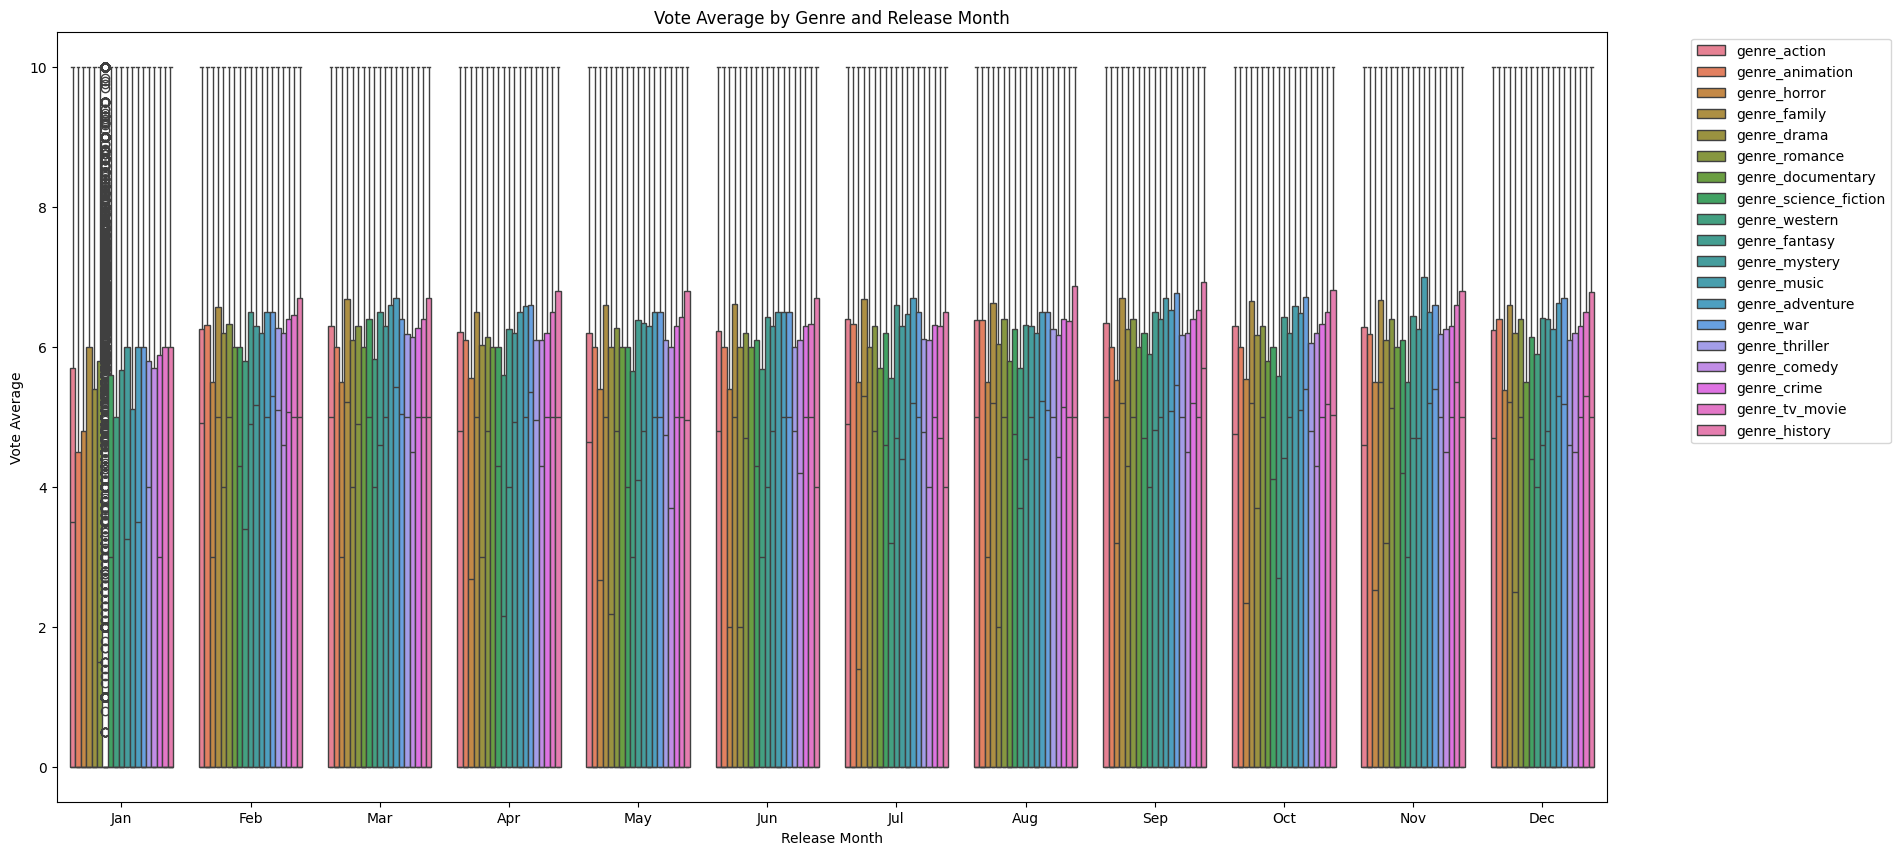

In [27]:
# Melt data for easier grouping
genres_melted = df.melt(id_vars=['release_month', 'vote_average', 'vote_count'], value_vars=genre_columns, 
                        var_name='genre', value_name='is_genre')

# Filter to keep only rows where the genre is present
genres_melted = genres_melted[genres_melted['is_genre'] == 1]

# Plot vote average by genre and release month
plt.figure(figsize=(20, 10))
sns.boxplot(data=genres_melted, x='release_month', y='vote_average', hue='genre')
plt.title('Vote Average by Genre and Release Month')
plt.xlabel('Release Month')
plt.ylabel('Vote Average')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
